# Jaffle Shop Data Analysis - Final Project

## Instructions
You have been hired as a data analyst for Jaffle Shop, a growing chain of gourmet toasted sandwich restaurants. The executive team needs insights to make strategic business decisions.

Using the provided datasets and Python Polars, analyze the business performance and provide data-driven recommendations. You must use Polars for all data manipulation and analysis.

## Available Data
- `Customers.csv`: Customer information
- `Orders.csv`: Order transactions with totals and timestamps
- `Items.csv`: Individual items within each order
- `Products.csv`: Product catalog with prices and descriptions
- `Stores.csv`: Store locations and opening dates
- `Supplies.csv`: Supply costs for each product

**Time Limit: 90 minutes**

## Setup and Data Loading

In [204]:
# Import necessary libraries
import polars as pl
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Set up plotting style
plt.style.use('seaborn-v0_8-darkgrid')

In [205]:
# Load all datasets
#customers = pl.read_csv('data/Customers.csv')
#orders = pl.read_csv('data/Orders.csv')
#items = pl.read_csv('data/Items.csv')
#products = pl.read_csv('data/Products.csv')
#stores = pl.read_csv('data/Stores.csv')
#supplies = pl.read_csv('data/Supplies.csv')

from google.colab import files
import polars as pl


customers = pl.read_csv("https://raw.githubusercontent.com/Masters-in-Management-2023-2024/final-project-jaffle-shop-gray-13/refs/heads/main/data/Customers.csv")
orders = pl.read_csv("https://raw.githubusercontent.com/Masters-in-Management-2023-2024/final-project-jaffle-shop-gray-13/refs/heads/main/data/Orders.csv")
items = pl.read_csv("https://raw.githubusercontent.com/Masters-in-Management-2023-2024/final-project-jaffle-shop-gray-13/refs/heads/main/data/Items.csv")
products = pl.read_csv("https://raw.githubusercontent.com/Masters-in-Management-2023-2024/final-project-jaffle-shop-gray-13/refs/heads/main/data/Products.csv")
stores = pl.read_csv("https://raw.githubusercontent.com/Masters-in-Management-2023-2024/final-project-jaffle-shop-gray-13/refs/heads/main/data/Stores.csv")
supplies = pl.read_csv("https://raw.githubusercontent.com/Masters-in-Management-2023-2024/final-project-jaffle-shop-gray-13/refs/heads/main/data/Supplies.csv")

# Display basic information about each dataset
print("Dataset shapes:")
print(f"Customers: {customers.shape}")
print(f"Orders: {orders.shape}")
print(f"Items: {items.shape}")
print(f"Products: {products.shape}")
print(f"Stores: {stores.shape}")
print(f"Supplies: {supplies.shape}")

Dataset shapes:
Customers: (932, 2)
Orders: (63148, 7)
Items: (90184, 3)
Products: (10, 5)
Stores: (6, 4)
Supplies: (65, 5)


## Question 1: Revenue Performance Analysis

The CFO wants to understand the company's financial performance across different dimensions. Analyze:
- What is the total revenue generated by Jaffle Shop? (Store result in variable: `total_revenue`)
- How does revenue vary by store location? (Store result in variable: `revenue_by_store`)
- What are the monthly revenue trends? (Store result in variable: `monthly_revenue_trends`)
- Which day of the week generates the most revenue? (Store result in variable: `revenue_by_day_of_week`)
- Include at least one chart for one of these questions

In [206]:
# Q1.1: Calculate total revenue
total_revenue = orders["order_total"].sum()
print(f"Total Revenue: ${total_revenue:,.2f}")

Total Revenue: $66,038,193.00


shape: (2, 2)
┌──────────────┬──────────┐
│ name         ┆ revenue  │
│ ---          ┆ ---      │
│ str          ┆ i64      │
╞══════════════╪══════════╡
│ Philadelphia ┆ 43215565 │
│ Brooklyn     ┆ 22822628 │
└──────────────┴──────────┘


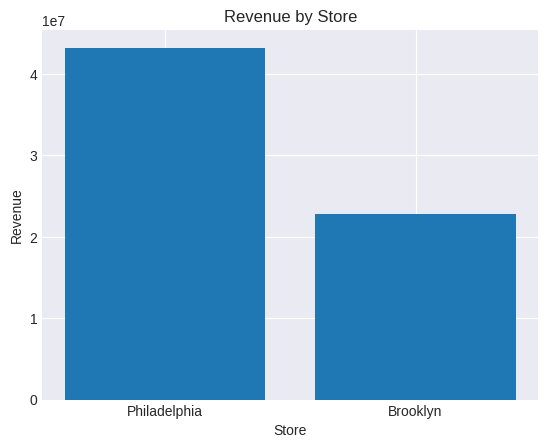

In [207]:
# Q1.2: Revenue by store location
revenue_by_store = (
    orders.join(stores, left_on="store_id", right_on="id")
    .group_by("name")
    .agg(pl.col("order_total").sum().alias("revenue"))
    .sort("revenue", descending=True)
)
print(revenue_by_store)


plt.bar(revenue_by_store["name"], revenue_by_store["revenue"])
plt.title("Revenue by Store")
plt.xlabel("Store")
plt.ylabel("Revenue")
plt.show()


In [210]:
# Q1.3: Monthly revenue trends

monthly_revenue = (
    orders
    .with_columns(pl.col("ordered_at").str.strptime(pl.Datetime, "%Y-%m-%dT%H:%M:%S").dt.truncate("1mo").alias("Year_Month"))
    .group_by("Year_Month")
    .agg(pl.col("order_total").sum().alias("monthly_revenue"))
    .sort("Year_Month")
)


monthly_revenue_trends = monthly_revenue.with_columns(
    pl.col("Year_Month").dt.strftime("%Y-%m").alias("Year_Month")
)

print(monthly_revenue_trends)

shape: (12, 2)
┌────────────┬─────────────────┐
│ Year_Month ┆ monthly_revenue │
│ ---        ┆ ---             │
│ str        ┆ i64             │
╞════════════╪═════════════════╡
│ 2016-09    ┆ 1644922         │
│ 2016-10    ┆ 1956651         │
│ 2016-11    ┆ 2552662         │
│ 2016-12    ┆ 3307337         │
│ 2017-01    ┆ 3821291         │
│ …          ┆ …               │
│ 2017-04    ┆ 7392014         │
│ 2017-05    ┆ 8469909         │
│ 2017-06    ┆ 8617148         │
│ 2017-07    ┆ 8585320         │
│ 2017-08    ┆ 9332296         │
└────────────┴─────────────────┘


In [212]:
# Q1.4: Revenue by day of week

revenue_by_day= (
    orders
    .with_columns(pl.col("ordered_at").str.strptime(pl.Datetime, "%Y-%m-%dT%H:%M:%S").dt.weekday().alias("week_day_number"))
    .with_columns(pl.col("ordered_at").str.strptime(pl.Datetime, "%Y-%m-%dT%H:%M:%S").dt.strftime("%A").alias("week_day_name"))
    .group_by(["week_day_number", "week_day_name"])
    .agg(pl.col("order_total").sum().alias("daily_revenue"))
    .sort("daily_revenue", descending= True)
)

revenue_by_day_of_week = revenue_by_day.drop("week_day_number")

print(revenue_by_day_of_week)

shape: (7, 2)
┌───────────────┬───────────────┐
│ week_day_name ┆ daily_revenue │
│ ---           ┆ ---           │
│ str           ┆ i64           │
╞═══════════════╪═══════════════╡
│ Wednesday     ┆ 10834569      │
│ Thursday      ┆ 10829195      │
│ Tuesday       ┆ 10814455      │
│ Friday        ┆ 10758715      │
│ Monday        ┆ 10611971      │
│ Sunday        ┆ 6207799       │
│ Saturday      ┆ 5981489       │
└───────────────┴───────────────┘


## Question 2: Product Performance

The Product Manager needs insights about the menu items:
- What is the revenue contribution of each product category (jaffles vs beverages)? (Store result in variable: `revenue_by_category`)
- What is the average price of products by type (jaffles vs beverages)?
- Include at least one chart to answer one of the above questions.

shape: (2, 2)
┌──────────┬──────────────────┐
│ type     ┆ category_revenue │
│ ---      ┆ ---              │
│ str      ┆ i64              │
╞══════════╪══════════════════╡
│ beverage ┆ 95183881         │
│ jaffle   ┆ 62031556         │
└──────────┴──────────────────┘


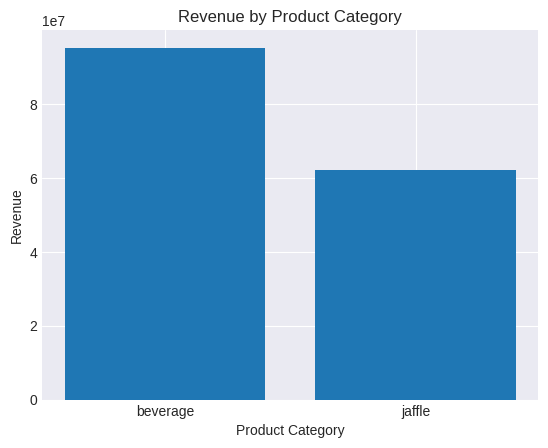

In [213]:
# Q2.1: Revenue by product category

revenue_by_category = (items
    .join(products, on="sku")
    .join(orders, left_on="order_id", right_on="id")
    .group_by("type")
    .agg(pl.col("order_total").sum().alias("category_revenue"))
    .sort("category_revenue", descending=True))

print(revenue_by_category)

# Plotting revenue by category
plt.bar(revenue_by_category["type"], revenue_by_category["category_revenue"])
plt.title("Revenue by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Revenue")
plt.show()

In [216]:
# Q2.2 Average price of products by type

average_price_by_type = (products
    .group_by("type")
    .agg(pl.col("price").mean().alias("average_price")))

print(average_price_by_type)

shape: (2, 2)
┌──────────┬───────────────┐
│ type     ┆ average_price │
│ ---      ┆ ---           │
│ str      ┆ f64           │
╞══════════╪═══════════════╡
│ beverage ┆ 560.0         │
│ jaffle   ┆ 1200.0        │
└──────────┴───────────────┘


## Question 3: Store Expansion Strategy

The Operations Director is planning expansion strategies:
- Which stores have the highest revenue per day since opening? (Store result in variable: `revenue_per_day_by_store`)
- What is the relationship between local tax rates and store performance? (Store result in variable: `tax_rate_performance`)
- Include at least one chart to answer one of the above questions.

In [217]:
# Q3.1: Revenue per day since opening by store
orders = orders.with_columns(pl.col("ordered_at").str.strptime(pl.Datetime, "%Y-%m-%dT%H:%M:%S").alias("order_date"))
rev_by_store = (orders.group_by("store_id")
    .agg(pl.col("order_total").sum().alias("total_revenue")))


max_dt = orders["order_date"].max()

revenue_per_day_by_store = (rev_by_store
    .join(stores, left_on="store_id", right_on="id", how="left")
    .with_columns(
        (
            (pl.lit(max_dt).cast(pl.Date) - pl.col("opened_at").str.strptime(pl.Datetime, "%Y-%m-%dT%H:%M:%S").cast(pl.Date))
            .dt.total_days() + 1
        ).alias("days_active"))
    .with_columns(
        (pl.col("total_revenue") / pl.col("days_active")).alias("revenue_per_day"))
    .select(["store_id", "name", "days_active", "total_revenue", "revenue_per_day"])
    .sort("revenue_per_day", descending=True))

print(revenue_per_day_by_store)

shape: (2, 5)
┌─────────────────────────────────┬──────────────┬─────────────┬───────────────┬─────────────────┐
│ store_id                        ┆ name         ┆ days_active ┆ total_revenue ┆ revenue_per_day │
│ ---                             ┆ ---          ┆ ---         ┆ ---           ┆ ---             │
│ str                             ┆ str          ┆ i64         ┆ i64           ┆ f64             │
╞═════════════════════════════════╪══════════════╪═════════════╪═══════════════╪═════════════════╡
│ a2a24e87-dec8-4f5d-9c9e-0e9849… ┆ Brooklyn     ┆ 173         ┆ 22822628      ┆ 131922.705202   │
│ a9128331-08d7-41a2-b615-21283e… ┆ Philadelphia ┆ 365         ┆ 43215565      ┆ 118398.808219   │
└─────────────────────────────────┴──────────────┴─────────────┴───────────────┴─────────────────┘


shape: (2, 3)
┌──────────────┬──────────┬─────────────────┐
│ name         ┆ tax_rate ┆ revenue_per_day │
│ ---          ┆ ---      ┆ ---             │
│ str          ┆ f64      ┆ f64             │
╞══════════════╪══════════╪═════════════════╡
│ Brooklyn     ┆ 0.04     ┆ 131922.705202   │
│ Philadelphia ┆ 0.06     ┆ 118398.808219   │
└──────────────┴──────────┴─────────────────┘


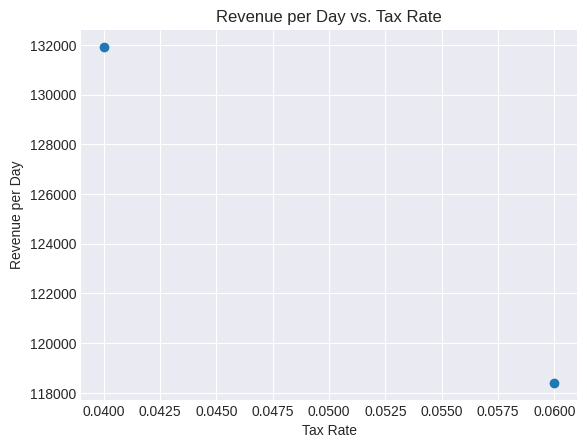

In [218]:
# Q3.2: Tax rates vs store performance

revenue_per_day_by_store = (revenue_per_day_by_store
    .join(stores, left_on="store_id", right_on="id", how="left")
    .select(["name", "tax_rate", "revenue_per_day"]))


tax_rate_performance = revenue_per_day_by_store.select(["name", "tax_rate", "revenue_per_day"])


print(tax_rate_performance)


plt.scatter(tax_rate_performance["tax_rate"], tax_rate_performance["revenue_per_day"])
plt.title("Revenue per Day vs. Tax Rate")
plt.xlabel("Tax Rate")
plt.ylabel("Revenue per Day")
plt.show()

## Question 4: Customer Behavior Analysis

The Marketing Manager wants to understand customer patterns:
- What is the distribution of order values? (Store result in variable: `order_value_distribution`)
- How many customers are repeat customers? (Store result in variable: `repeat_customer_analysis`)
- Which customers contribute the most to revenue? (Store result in variable: `top_revenue_customers`)

shape: (9, 2)
┌────────────┬─────────────┐
│ statistic  ┆ order_total │
│ ---        ┆ ---         │
│ str        ┆ f64         │
╞════════════╪═════════════╡
│ count      ┆ 63148.0     │
│ null_count ┆ 0.0         │
│ mean       ┆ 1045.76856  │
│ std        ┆ 1025.930713 │
│ min        ┆ 0.0         │
│ 25%        ┆ 530.0       │
│ 50%        ┆ 636.0       │
│ 75%        ┆ 1165.0      │
│ max        ┆ 10281.0     │
└────────────┴─────────────┘


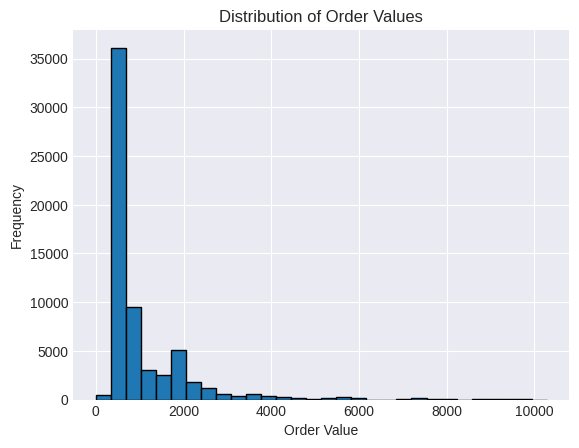

In [219]:
# Q4.1: Distribution of order values
order_value_distribution = orders.select("order_total")
print(order_value_distribution.describe())

plt.hist(order_value_distribution["order_total"], bins=30, edgecolor="black")
plt.title("Distribution of Order Values")
plt.xlabel("Order Value")
plt.ylabel("Frequency")
plt.show()

In [220]:
# Q4.2: Repeat customers analysis
repeat_customer_analysis = (orders.group_by("customer")
    .agg(pl.len().alias("num_orders"))
    .with_columns((pl.col("num_orders") > 1).alias("repeat_customers")))

num_repeat_customers = repeat_customer_analysis["repeat_customers"].sum()
num_total_customers = repeat_customer_analysis.height

print(f"Total Customers: {num_total_customers}")
print(f"Repeat Customers: {num_repeat_customers}")
print(f"Percentage Repeat: {100*num_repeat_customers/num_total_customers:.2f}%")

Total Customers: 930
Repeat Customers: 920
Percentage Repeat: 98.92%


shape: (10, 3)
┌─────────────────────────────────┬───────────────┬──────────────────────┐
│ customer                        ┆ total_revenue ┆ name                 │
│ ---                             ┆ ---           ┆ ---                  │
│ str                             ┆ i64           ┆ str                  │
╞═════════════════════════════════╪═══════════════╪══════════════════════╡
│ ea3ada4c-8ffa-4e73-a51f-27711f… ┆ 262647        ┆ David Leonard        │
│ 4fb3b92c-29cc-410f-a898-9784c4… ┆ 259037        ┆ Jesse Moore          │
│ 99facd33-7b11-4955-aa0d-ccd118… ┆ 258515        ┆ Diane Davis          │
│ 8bbf796d-0862-41c6-b533-38d6c2… ┆ 252703        ┆ Holly Johnson        │
│ bc94ad77-6703-48d9-85d9-7908e7… ┆ 249821        ┆ Gregory Hayes        │
│ 3ddc958e-73f5-4fe9-804e-d63c8b… ┆ 247510        ┆ Julie Robinson       │
│ 0b92fd92-9200-47fe-9b57-9ada88… ┆ 246325        ┆ Christopher Robinson │
│ a54f0762-0ac2-4821-bb45-835fd4… ┆ 244102        ┆ Douglas Burgess      │
│ 666caf4d

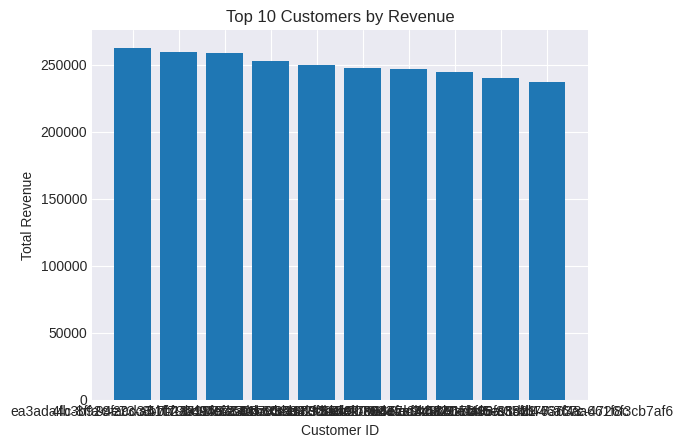

In [221]:
# Q4.3: Top revenue contributors
top_revenue_customers = (orders.group_by("customer")
    .agg(pl.col("order_total").sum().alias("total_revenue"))
    .join(customers, left_on="customer", right_on="id", how="left")
    .sort("total_revenue", descending=True)
    .head(10))

print(top_revenue_customers)

plt.bar(top_revenue_customers["customer"], top_revenue_customers["total_revenue"])
plt.title("Top 10 Customers by Revenue")
plt.xlabel("Customer ID")
plt.ylabel("Total Revenue")
plt.show()

## Question 5: Profitability Deep Dive

The CEO needs a comprehensive profitability analysis:
- Calculate the gross margin for each product (consider supply costs) (Store result in variable: `product_margins`)
- Which products have the highest profit margins? (Store result in variable: `highest_margin_products`)
- What is the relationship between order size and profitability? (Store result in variable: `order_size_profitability`)
- How does profitability vary across different stores? (Store result in variable: `store_profitability`)

In [222]:
# Q5.1: Calculate gross margin per product

product_margins = (items
    .join(products.select(["sku", "name", "price"]), left_on="sku", right_on="sku", how="left")
    .join(supplies.select(["sku", "cost"]), on="sku", how="left")
    .with_columns([
        (pl.col("price") - pl.col("cost")).alias("gross_margin"),
        (pl.col("price")).alias("revenue"),
        (pl.col("cost")).alias("cost")])
    .group_by(["sku", "name"])
    .agg([
        pl.col("gross_margin").sum().alias("gross_profit"),
        pl.col("price").sum().alias("revenue"),
        pl.col("cost").sum().alias("cost")])
    .with_columns([
        (pl.col("gross_profit") / pl.col("revenue")).alias("margin_rate")])
    .sort("margin_rate"))

print(product_margins)

shape: (10, 6)
┌─────────┬─────────────────────────┬──────────────┬──────────┬─────────┬─────────────┐
│ sku     ┆ name                    ┆ gross_profit ┆ revenue  ┆ cost    ┆ margin_rate │
│ ---     ┆ ---                     ┆ ---          ┆ ---      ┆ ---     ┆ ---         │
│ str     ┆ str                     ┆ i64          ┆ i64      ┆ i64     ┆ f64         │
╞═════════╪═════════════════════════╪══════════════╪══════════╪═════════╪═════════════╡
│ BEV-002 ┆ chai and mighty         ┆ 40564175     ┆ 43077000 ┆ 2512825 ┆ 0.941667    │
│ BEV-003 ┆ vanilla ice             ┆ 40125754     ┆ 42297000 ┆ 2171246 ┆ 0.948667    │
│ JAF-003 ┆ the krautback           ┆ 40296108     ┆ 41709600 ┆ 1413492 ┆ 0.966111    │
│ JAF-002 ┆ doctor stew             ┆ 28611609     ┆ 29575700 ┆ 964091  ┆ 0.967403    │
│ BEV-005 ┆ adele-ade               ┆ 27228409     ┆ 28114000 ┆ 885591  ┆ 0.9685      │
│ BEV-004 ┆ for richer or pourover  ┆ 38641806     ┆ 39807600 ┆ 1165794 ┆ 0.970714    │
│ BEV-001 ┆ tanga

In [223]:
# Q5.2: Products with highest profit margins
highest_margin_products = product_margins.sort("margin_rate", descending=True)
print(highest_margin_products)

shape: (10, 6)
┌─────────┬─────────────────────────┬──────────────┬──────────┬─────────┬─────────────┐
│ sku     ┆ name                    ┆ gross_profit ┆ revenue  ┆ cost    ┆ margin_rate │
│ ---     ┆ ---                     ┆ ---          ┆ ---      ┆ ---     ┆ ---         │
│ str     ┆ str                     ┆ i64          ┆ i64      ┆ i64     ┆ f64         │
╞═════════╪═════════════════════════╪══════════════╪══════════╪═════════╪═════════════╡
│ JAF-001 ┆ nutellaphone who dis?   ┆ 28875990     ┆ 29337000 ┆ 461010  ┆ 0.984286    │
│ JAF-005 ┆ mel-bun                 ┆ 35796464     ┆ 36710400 ┆ 913936  ┆ 0.975104    │
│ JAF-004 ┆ flame impala            ┆ 45890208     ┆ 47174400 ┆ 1284192 ┆ 0.972778    │
│ BEV-001 ┆ tangaroo                ┆ 41934578     ┆ 43113000 ┆ 1178422 ┆ 0.972667    │
│ BEV-004 ┆ for richer or pourover  ┆ 38641806     ┆ 39807600 ┆ 1165794 ┆ 0.970714    │
│ BEV-005 ┆ adele-ade               ┆ 27228409     ┆ 28114000 ┆ 885591  ┆ 0.9685      │
│ JAF-002 ┆ docto

shape: (62_642, 3)
┌─────────────────────────────────┬────────────────────┬────────────┐
│ order_id                        ┆ order_gross_margin ┆ order_size │
│ ---                             ┆ ---                ┆ ---        │
│ str                             ┆ i64                ┆ u32        │
╞═════════════════════════════════╪════════════════════╪════════════╡
│ ba3b4ae9-f8d6-47f8-8629-dc631a… ┆ 2718               ┆ 4          │
│ 74756104-f0de-475c-8330-ddfab1… ┆ 2718               ┆ 4          │
│ a5f1e799-7bb6-406f-8a4d-961471… ┆ 2718               ┆ 4          │
│ 29666b9b-2c1d-4968-b24a-923034… ┆ 2718               ┆ 4          │
│ b9da3e14-ee72-4e08-8133-8c6912… ┆ 2718               ┆ 4          │
│ …                               ┆ …                  ┆ …          │
│ 4a385993-e0a1-4716-8371-254364… ┆ 64924              ┆ 69         │
│ ac4693c0-f329-49a1-8cff-26dcbb… ┆ 64125              ┆ 69         │
│ 46582e45-854d-4d24-b068-c4440a… ┆ 67730              ┆ 69         │
│

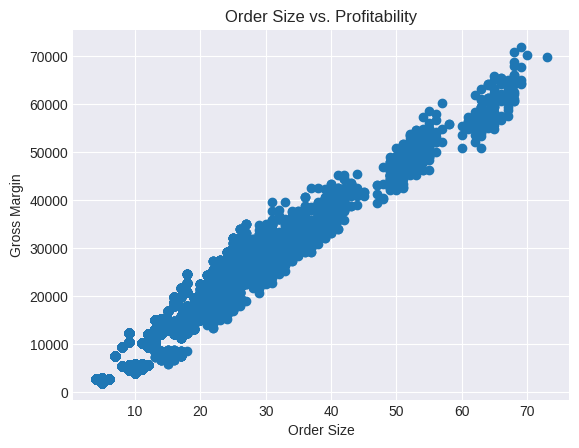

In [224]:
# Q5.3: Order size vs profitability
order__size_profitability = (items
    .join(products.select(["sku", "price"]), on="sku", how="left")
    .join(supplies.select(["sku", "cost"]), on="sku", how="left")
    .with_columns([
        (pl.col("price") - pl.col("cost")).alias("item_gross_margin")
    ])
    .group_by("order_id")
    .agg([
        pl.col("item_gross_margin").sum().alias("order_gross_margin"),
        pl.col("sku").count().alias("order_size")
    ])
    .sort("order_size"))

print(order_size_profitability)


plt.scatter(order_profitability["order_size"], order_profitability["order_gross_margin"])
plt.title("Order Size vs. Profitability")
plt.xlabel("Order Size")
plt.ylabel("Gross Margin")
plt.show()

In [225]:
# Q5.4: Profitability by store

store_profitability = (orders
    .join(items, left_on="id", right_on="order_id")
    .join(products.select(["sku", "price"]), on="sku", how="left")
    .join(supplies.select(["sku", "cost"]), on="sku", how="left")
    .with_columns([
        (pl.col("price") - pl.col("cost")).alias("item_gross_profit")
    ])
    .group_by("store_id")
    .agg(pl.col("item_gross_profit").sum().alias("total_gross_profit"))
    .join(stores.select(["id", "name"]), left_on="store_id", right_on="id")
    .select(["name", "total_gross_profit"])
    .sort("total_gross_profit", descending=True))

print(store_profitability)

shape: (2, 2)
┌──────────────┬────────────────────┐
│ name         ┆ total_gross_profit │
│ ---          ┆ ---                │
│ str          ┆ i64                │
╞══════════════╪════════════════════╡
│ Philadelphia ┆ 239888460          │
│ Brooklyn     ┆ 128076641          │
└──────────────┴────────────────────┘


## Question 6: Business Optimization Recommendations

Based on your analysis, provide three specific, data-driven recommendations to improve business performance. Support each recommendation with relevant metrics and visualizations.

Recommendation #1: Increase Marketing for Weekends

Summary/ Recommendations: Our analysis shows that the store generates significantly less revenue on weekends compared to weekdays. This pattern represents a critical gap in performance. In industries such as restaurants and services, weekends are traditionally the highest-revenue periods. Customers typically have more free time, engage in social activities, and are more willing to spend disposable income on dining and leisure. In order to drive performance on the weekends, we recommend weekend promotions and events /experiences for customers to drive foot traffic!

Supporting Evidence: Analysis from Q1.4 shows the revenue distribution by day of week is consistently higher Monday through Friday, averaging ~ 10.7𝑀𝑝𝑒𝑟𝑑𝑎𝑦(𝑟𝑎𝑛𝑔𝑒: 10.6M– 10.8𝑀).𝑂𝑛𝑆𝑎𝑡𝑢𝑟𝑑𝑎𝑦𝑎𝑛𝑑𝑆𝑢𝑛𝑑𝑎𝑦,𝑡ℎ𝑒𝑟𝑒𝑣𝑒𝑛𝑢𝑒𝑑𝑟𝑜𝑝𝑠𝑡𝑜  6M, which is nearly 42% lower than weekdays. There is a significant missed opportunity for the store because the potential upside is ~ 470𝑀– 500M in unrealized sales if weekend revenue matched weekday averages of around ~10.7M. This way the store could generate an additional ~$9-10M per week.

In [ ]:
# Supporting analysis for Recommendation 1

# Q1.4: Revenue by day of week

revenue_by_day= (
    orders
    .with_columns(pl.col("ordered_at").str.strptime(pl.Datetime, "%Y-%m-%dT%H:%M:%S").dt.weekday().alias("week_day_number"))
    .with_columns(pl.col("ordered_at").str.strptime(pl.Datetime, "%Y-%m-%dT%H:%M:%S").dt.strftime("%A").alias("week_day_name"))
    .group_by(["week_day_number", "week_day_name"])
    .agg(pl.col("order_total").sum().alias("Revenue"))
    .sort("Revenue", descending= True)
)

revenue_by_day_of_week = revenue_by_day.drop("week_day_number")

print(revenue_by_day_of_week)



Recommendation #2:  Highlight Brooklyn Store Profits/Sales Long-Term

Summary/ Recommendation: We looked at how the Brooklyn store was performing revenue wise on a daily basis, but also overall. In the short-term, it would be beneficial to dive more into understanding why the Philadelphia store is ‘underperforming’ and perform research to gain more insights into this store. In the long-term, we recommend prioritizing and focusing on Brooklyn more due to its growth potential and its high daily revenue. There is a significant difference in revenue between the two stores daily. In addition, performance is higher in cities with less taxes. In the future, we recommend opening new stores in less taxable cities.

Supporting Evidence: Based on our analysis from Q3.1 into the store, we have learned that Brooklyn has the highest revenue per day, with $131,922.71 compared to $118,398,80. The Brooklyn store has been open for less time, only 173 days compared to 365 days for Philadelphia. This means that despite being open for less time, this store is generating higher revenue per day. Moreover, from 3.2 the tax rate in Brooklyn is 0.04% in comparison to 0.06% in Philadelphia. The higher performance store is located in an area with a lower tax rate.

In [ ]:
# Q3.1: Revenue per day since opening by store
orders = orders.with_columns(pl.col("ordered_at").str.strptime(pl.Datetime, "%Y-%m-%dT%H:%M:%S").alias("order_date"))
rev_by_store = (orders.group_by("store_id")
    .agg(pl.col("order_total").sum().alias("total_revenue")))


max_dt = orders["order_date"].max()

revenue_per_day_by_store = (rev_by_store
    .join(stores, left_on="store_id", right_on="id", how="left")
    .with_columns(
        (
            (pl.lit(max_dt).cast(pl.Date) - pl.col("opened_at").str.strptime(pl.Datetime, "%Y-%m-%dT%H:%M:%S").cast(pl.Date))
            .dt.total_days() + 1
        ).alias("days_active"))
    .with_columns(
        (pl.col("total_revenue") / pl.col("days_active")).alias("revenue_per_day"))
    .select(["store_id", "name", "days_active", "total_revenue", "revenue_per_day"])
    .sort("revenue_per_day", descending=True))

print(revenue_per_day_by_store)

# Q3.2: Tax rates vs store performance

revenue_per_day_by_store = (revenue_per_day_by_store
    .join(stores, left_on="store_id", right_on="id", how="left")
    .select(["name", "tax_rate", "revenue_per_day"]))


tax_rate_performance = revenue_per_day_by_store.select(["name", "tax_rate", "revenue_per_day"])


print(tax_rate_performance)


plt.scatter(tax_rate_performance["tax_rate"], tax_rate_performance["revenue_per_day"])
plt.title("Revenue per Day vs. Tax Rate")
plt.xlabel("Tax Rate")
plt.ylabel("Revenue per Day")
plt.show()


Recommendation #3: Highlight Marketing to Non Repeat Customers to Increase Market Share

Summary/ Recommendation:
For sustainable growth, we recommend tapping into a new customer market using penetration pricing strategy. This approach involves setting prices slightly lower than our competitors to attract customers who have not yet tried our offerings by encouraging trial purchases and new customer discounts and loyalty cards. Once these customers experience our product and perceive its value, we can gradually adjust prices to improve margins while retaining their loyalty. This can lead to increasing our customer base and reduce the overdependencies on repeat buyers, leading to a more long-term expansion of the brand..

Supporting Evidence: From Q4.2, our analysis shows that 920 out of 930 i.e., 98.92% of the customers were recurring, leaving just 10 unique first-time customers 1.08 %. If repeat customers already make up a large share of your sales, it suggests the existing demographic is close to saturation. Additional marketing spend on the same group will yield diminishing returns.


In [ ]:
# Q4.2: Repeat customers analysis
repeat_customer_analysis = (orders.group_by("customer")
    .agg(pl.len().alias("num_orders"))
    .with_columns((pl.col("num_orders") > 1).alias("repeat_customers")))

num_repeat_customers = repeat_customer_analysis["repeat_customers"].sum()
num_total_customers = repeat_customer_analysis.height

print(f"Total Customers: {num_total_customers}")
print(f"Repeat Customers: {num_repeat_customers}")
print(f"Percentage Repeat: {100*num_repeat_customers/num_total_customers:.2f}%")




## Executive Summary

Based on our findings, we recommend that the restaurant/ store increase marketing on weekends, increase the promotion of the Brooklyn store, and highlight entering new markets to increase non-repeat customers. We believe that these three strategic recommendations will increase the revenue of the store significantly.

### Key Findings:
1. Saturday and Sunday have the lowest revenue per week.
2. Brooklyn has less total revenue than Philadelphia but has a higher revenue per day. This can be explained by the fact that it has been open for only 173 days in comparison to 365.
3. A high number of repeat customers

### Strategic Recommendations:
1. Increase Marketing for Weekends
2. Highlight Brooklyn Store Profits/Sales Long-Term
3. Highlight Marketing to Non Repeat Customers to Increase Market Share
